In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import audiocraft

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.8.18 (you have 3.8.10)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
/home/jongmin/.local/share/virtualenvs/audiocraft-ssbSDm-j/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import torchaudio
from audiocraft.models import AudioGen
from audiocraft.data.audio import audio_write

model = AudioGen.get_pretrained('facebook/audiogen-medium')

In [ ]:
encodec = model.compression_model

In [13]:
encodec

EncodecModel(
  (encoder): SEANetEncoder(
    (model): Sequential(
      (0): StreamableConv1d(
        (conv): NormConv1d(
          (conv): Conv1d(1, 64, kernel_size=(7,), stride=(1,))
          (norm): Identity()
        )
      )
      (1): SEANetResnetBlock(
        (block): Sequential(
          (0): ELU(alpha=1.0)
          (1): StreamableConv1d(
            (conv): NormConv1d(
              (conv): Conv1d(64, 32, kernel_size=(3,), stride=(1,))
              (norm): Identity()
            )
          )
          (2): ELU(alpha=1.0)
          (3): StreamableConv1d(
            (conv): NormConv1d(
              (conv): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
              (norm): Identity()
            )
          )
        )
        (shortcut): Identity()
      )
      (2): ELU(alpha=1.0)
      (3): StreamableConv1d(
        (conv): NormConv1d(
          (conv): Conv1d(64, 128, kernel_size=(4,), stride=(2,))
          (norm): Identity()
        )
      )
      (4): SEANetRe

In [2]:
from audiocraft.utils import export

In [3]:
from audiocraft import train

Dora directory: /tmp/audiocraft_jongmin


In [4]:
xp = train.main.get_xp_from_sig('SIG')

RuntimeError: Could not find experiment with signature SIG

In [5]:
import torch

In [15]:
torch.save(encodec.state_dict(), "encodec_16khz.pt")

In [43]:
from audiocraft.models import CompressionModel

In [44]:
model = CompressionModel.get_pretrained('facebook/encodec_32khz')

/home/jongmin/.local/share/virtualenvs/audiocraft-ssbSDm-j/lib/python3.8/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [48]:
a = model.decode(train_features[0].unsqueeze(0))
a

tensor([[[0.0521, 0.0510, 0.0519,  ..., 0.0419, 0.0461, 0.0495]]],
       grad_fn=<ConvolutionBackward0>)

In [ ]:
model

HFEncodecCompressionModel(
  (model): EncodecModel(
    (encoder): EncodecEncoder(
      (layers): ModuleList(
        (0): EncodecConv1d(
          (conv): Conv1d(1, 64, kernel_size=(7,), stride=(1,))
        )
        (1): EncodecResnetBlock(
          (block): ModuleList(
            (0): ELU(alpha=1.0)
            (1): EncodecConv1d(
              (conv): Conv1d(64, 32, kernel_size=(3,), stride=(1,))
            )
            (2): ELU(alpha=1.0)
            (3): EncodecConv1d(
              (conv): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (shortcut): Identity()
        )
        (2): ELU(alpha=1.0)
        (3): EncodecConv1d(
          (conv): Conv1d(64, 128, kernel_size=(8,), stride=(4,))
        )
        (4): EncodecResnetBlock(
          (block): ModuleList(
            (0): ELU(alpha=1.0)
            (1): EncodecConv1d(
              (conv): Conv1d(128, 64, kernel_size=(3,), stride=(1,))
            )
            (2): ELU(alpha=1.0)
   

In [ ]:
from audiocraft.quantization.vq import ResidualVectorQuantizer
qt = 



In [16]:
model.model.quantizer.codebook_size

2048

In [6]:
model.model.quantizer.frame_rate

50

In [7]:
model.model.quantizer.num_quantizers

4

In [8]:
model.model.quantizer.layers[0].codebook.embed.shape

torch.Size([2048, 128])

In [9]:
model.model.quantizer.layers[1].codebook.embed.shape

torch.Size([2048, 128])

In [13]:
import torch
import torch.nn as nn

In [11]:
from audiocraft.modules.seanet import SEANetEncoder, SEANetDecoder

In [163]:
randtensor = torch.rand(1,1,6000)
randzerotensor = randtensor.clone()
# randzerotensor[...,3025+640*4:] = 0

randzerotensor[...,:159] = 0

In [164]:
out1 = randtensor.clone()
for i in range(16):
    if i == 13:
        continue
    out1 = model.model.encoder.layers[i](out1)
out1.shape, out1

(torch.Size([1, 128, 10]),
 tensor([[[ 25.0150,  18.4708,  19.1764,  ...,  20.8460,  20.2746,  23.9823],
          [-23.8078, -18.6173, -22.0167,  ..., -19.8196, -19.7216, -21.2139],
          [ 41.0130,  43.5395,  48.7904,  ...,  44.2428,  39.0163,  44.6526],
          ...,
          [-32.5187, -37.9382, -34.1915,  ..., -32.2958, -37.2285, -33.2358],
          [-46.6320, -46.2041, -46.3125,  ..., -47.3281, -48.8089, -46.3694],
          [ 13.1234,  11.2212,  12.2096,  ...,   9.4781,  13.1360,  11.0603]]],
        grad_fn=<ConvolutionBackward0>))

In [165]:
out2 = randzerotensor.clone()
for i in range(16):
    if i == 13:
        continue
    out2 = model.model.encoder.layers[i](out2)
out2.shape, out2

(torch.Size([1, 128, 10]),
 tensor([[[ 25.1233,  11.6300,  17.3101,  ...,  20.8460,  20.2746,  23.9823],
          [-20.3171, -12.9052, -20.3691,  ..., -19.8196, -19.7216, -21.2139],
          [ 35.4495,  39.3058,  48.4750,  ...,  44.2428,  39.0163,  44.6526],
          ...,
          [-22.9272, -33.0387, -34.3137,  ..., -32.2958, -37.2285, -33.2358],
          [-38.9340, -43.4054, -47.9893,  ..., -47.3281, -48.8089, -46.3694],
          [ 15.7622,   8.9985,  12.9899,  ...,   9.4781,  13.1360,  11.0603]]],
        grad_fn=<ConvolutionBackward0>))

In [166]:
(out1[...,4] == out2[...,4])

tensor([[False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False, False,
         False, False, False, False, False, False, F

In [39]:
(out1[...,0] == out2[...,0]).all()

tensor(True)

In [45]:
model.model.encoder(torch.ones(1,1,5)).shape

torch.Size([1, 128, 1])

In [44]:
model.model.encoder(torch.ones(1,1,640)).shape

torch.Size([1, 128, 1])

In [46]:
model.model.encoder(torch.ones(1,1,641)).shape

torch.Size([1, 128, 2])

In [43]:
model.model.encoder(torch.ones(1,1,1280)).shape

torch.Size([1, 128, 2])

In [47]:
model.model.encoder(torch.ones(1,1,1281)).shape

torch.Size([1, 128, 3])

In [2]:
import torch

In [161]:
randtensor = torch.rand(1,1,6400)

In [162]:
out1 = model.model.encoder(randtensor)
out1.shape, out1[...,1]

(torch.Size([1, 128, 10]),
 tensor([[ 20.6810, -18.5890,  41.6637,  37.6875,  -2.9354, -14.5657,  -5.9313,
           24.0236,  -7.3216,   2.8094,  42.1190, -24.3868,  56.8644,  15.1781,
          -22.7497,  21.5421,  16.7662, -19.3118, -25.5029,  -9.8010, -11.5770,
           15.4725,  43.5692, -10.9208, -17.6076,  26.4120,  -5.7901,  11.2598,
           -8.4114,  12.5848,  -9.2036,  -4.6263,  40.7160,  40.7061,   6.3124,
            9.6375,  -8.5226,  10.0167,  10.8858,   7.7447,  -8.0853, -24.2742,
           24.8063,  11.5690, -54.3635,  35.6627,  51.3472,  25.5130,  -6.9822,
          -41.2613,  -8.6412,  -2.0162,  29.3933,  18.7768,  -1.8058,   4.5190,
           57.4132,  42.8793,  11.6538,   1.3179,  14.6697, -43.4206,   8.1313,
           -2.7232,  -2.5534,  17.8399,  -3.5643,   3.0605,  -2.1843,   7.7620,
            9.2671,   6.0419,   5.6333,  22.4540, -24.6412,  13.6600,  16.0306,
            3.5856,   2.4895, -28.2467,   6.8944,  -5.7042, -21.7356,  12.4850,
          -28

In [175]:
randzerotensor = randtensor.clone()
# randzerotensor[...,6399:] = 0
# randzerotensor[...,:1] = 0

In [176]:
out2 = model.model.encoder(randzerotensor)
out2.shape, out2[...,1]

(torch.Size([1, 128, 10]),
 tensor([[ 20.6810, -18.5890,  41.6637,  37.6875,  -2.9354, -14.5657,  -5.9313,
           24.0236,  -7.3216,   2.8094,  42.1190, -24.3868,  56.8644,  15.1781,
          -22.7497,  21.5421,  16.7662, -19.3118, -25.5029,  -9.8010, -11.5770,
           15.4725,  43.5692, -10.9208, -17.6076,  26.4120,  -5.7901,  11.2598,
           -8.4114,  12.5848,  -9.2036,  -4.6263,  40.7160,  40.7061,   6.3124,
            9.6375,  -8.5226,  10.0167,  10.8858,   7.7447,  -8.0853, -24.2742,
           24.8063,  11.5690, -54.3635,  35.6627,  51.3472,  25.5130,  -6.9822,
          -41.2613,  -8.6412,  -2.0162,  29.3933,  18.7768,  -1.8058,   4.5190,
           57.4132,  42.8793,  11.6538,   1.3179,  14.6697, -43.4206,   8.1313,
           -2.7232,  -2.5534,  17.8399,  -3.5643,   3.0605,  -2.1843,   7.7620,
            9.2671,   6.0419,   5.6333,  22.4540, -24.6412,  13.6600,  16.0306,
            3.5856,   2.4895, -28.2467,   6.8944,  -5.7042, -21.7356,  12.4850,
          -28

In [178]:
i = -1
out1[...,i] == out2[...,i]

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True]])

In [261]:
model.model.quantizer.encode(out1)

tensor([[[ 413,  413,  413,  413,  413,  413,  413,  413,  413,  413]],

        [[1895, 1895, 1895, 1895,  408,  408,  408,  408,  408,  408]],

        [[ 541,  541,  541,  541, 1996,  541,  541, 1996,  541,  541]],

        [[1367, 1043, 1043, 1043,  559,  559,  559,  559,  559,  559]]])

In [262]:
model.model.quantizer.encode(out2)

tensor([[[ 413,  413,  413,  413,  413,  413,  413,  753,  166,  753]],

        [[1895, 1895, 1895, 1895, 1895,  408,  515, 1035, 1931, 1931]],

        [[ 541,  541,  541,  541,  541,  541, 1771,   15, 1417, 2009]],

        [[1367, 1043, 1043, 1043, 1367, 1043,  622, 2045, 1992, 1759]]])

In [115]:
torch.equal(out1[...,0], out2[...,0])

False

In [116]:
randtensor == randzerotensor

tensor([[[ True,  True,  True,  ..., False, False, False]]])

In [ ]:
class SemCodecMidiDecoder(nn.Module):
  def __init__(self, in_channels, out_channels=88):
      super().__init__()
      self.layers = nn.Sequential(
            nn.ConvTranspose1d(in_channels=128, out_channels=32, kernel_size=10, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels=32, out_channels=64, kernel_size=10, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels=64, out_channels=128, kernel_size=10, stride=2, padding=1),
            nn.ReLU(),
            # Add more layers as needed
        )
  
  def forward(self, x):
      x = self.conv(x)
      x = self.act(x)
      x = self.bn(x)
      return x

In [45]:
import torchaudio
import torch
from pathlib import Path
import os
import pretty_midi
import numpy as np

class EnCodecTokenMIDIDataset(torch.utils.data.Dataset):
    def __init__(self, path, transform=None):
        self.path = Path(path)
        self.transform = transform
        self.midi_files = sorted(list(self.path.rglob('*.midi')))
        self.midi_files.sort()

    def __len__(self):
        return len(self.midi_files)

    def __getitem__(self, idx):
        midi_file = self.midi_files[idx]
        midi = pretty_midi.PrettyMIDI(str(midi_file))
        midi_tensor = torch.tensor(midi.get_piano_roll(fs=50)).float()
        if self.transform:
            midi_tensor = self.transform(midi_tensor)
        return midi_tensor

In [46]:
en_dataset = EnCodecTokenMIDIDataset('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0')

In [47]:
len(en_dataset)

1276

In [48]:
en_dataset[0].shape

torch.Size([128, 48451])

In [50]:
en0 = pretty_midi.PrettyMIDI(str(en_dataset.midi_files[0]))

In [51]:
import numpy as np

In [52]:
np.arange(0+0.04725, en0.get_end_time()+0.04725, 1/50)

array([4.7250000e-02, 6.7250000e-02, 8.7250000e-02, ..., 9.6902725e+02,
       9.6904725e+02, 9.6906725e+02])

In [53]:
en0.get_end_time()

969.0208333333334

In [299]:
en0.instruments[0].notes[0].start

1.0927083333333334

In [300]:
len(en0.instruments[0].pitch_bends)

7894

In [34]:
def slice_midi(midi_data, start_time, end_time):

    # Create a new PrettyMIDI object for the sliced data
    sliced_midi_data = pretty_midi.PrettyMIDI()

    # Iterate over all instruments in the original MIDI data
    for instrument in midi_data.instruments:
        # Create a new instrument object for the sliced data
        sliced_instrument = pretty_midi.Instrument(program=instrument.program, is_drum=instrument.is_drum, name=instrument.name)

        # Slice the notes
        for note in instrument.notes:
            # If the note is within the slice times
            if start_time <= note.start < end_time:
                # Copy the note and adjust the start and end times
                new_note = pretty_midi.Note(
                    velocity=note.velocity,
                    pitch=note.pitch,
                    start=max(note.start, start_time) - start_time,
                    end=min(note.end, end_time) - start_time
                )
                sliced_instrument.notes.append(new_note)

        # Slice the pitch bends
        for pitch_bend in instrument.pitch_bends:
            if start_time <= pitch_bend.time < end_time:
                # Copy the pitch bend and adjust the time
                new_pitch_bend = pretty_midi.PitchBend(
                    pitch=pitch_bend.pitch,
                    time=pitch_bend.time - start_time
                )
                sliced_instrument.pitch_bends.append(new_pitch_bend)

        # Slice the control changes
        for control_change in instrument.control_changes:
            if start_time <= control_change.time < end_time:
                # Copy the control change and adjust the time
                new_control_change = pretty_midi.ControlChange(
                    number=control_change.number,
                    value=control_change.value,
                    time=control_change.time - start_time
                )
                sliced_instrument.control_changes.append(new_control_change)

        # Add the sliced instrument to the new MIDI data
        sliced_midi_data.instruments.append(sliced_instrument)

    return sliced_midi_data

In [54]:
en0_0_30 = slice_midi(en0, 0, 30)

In [55]:
len(en0_0_30.instruments[0].notes)

256

In [340]:
en0_0_30.instruments[0].notes[-1]

Note(start=29.795833, end=30.000000, pitch=77, velocity=62)

In [341]:
en0_0_30.instruments[0].pitch_bends

[]

In [343]:
en0_0_30.instruments[0]

Instrument(program=0, is_drum=False, name="")

In [344]:
en0_0_30.instruments[0].get_end_time()

30

In [345]:
en0_0_30.time_signature_changes

[]

In [346]:
en0_0_30.key_signature_changes

[]

In [347]:
en0_0_30.lyrics

[]

In [348]:
en0_0_30.text_events

[]

In [56]:
en0_0_30.get_end_time()

30

In [57]:
en0_0_30.get_piano_roll(fs=50).shape

(128, 1500)

In [1]:
import torch

In [4]:
loaded = torch.load("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.pt")

In [10]:
loaded.keys()

dict_keys(['len', 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, -1])

In [11]:
from pathlib import Path

In [13]:
def _prepare_encodec_tokens(token_path):
    encodec_tokens_path = Path(token_path)
    encodec_tokens_list = sorted(list(encodec_tokens_path.rglob('*.pt')))
    encodec_tokens_list = [(encodec_token.stem, torch.load(encodec_token)) for encodec_token in encodec_tokens_list]
    return encodec_tokens_list

In [28]:
a = _prepare_encodec_tokens('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0')

In [29]:
a[0]

('MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav',
 {'len': 33,
  0: tensor([[[ 166,  166,   83,  ...,  942, 1968, 1828],
           [1931, 2044, 1926,  ..., 1115, 1115, 1150],
           [2019, 2019, 2009,  ..., 2015, 2004, 1645],
           [1951, 1951, 1854,  ...,  553, 1387,  412]]]),
  30: tensor([[[  66, 1634, 1146,  ..., 1721, 1204, 1204],
           [1955, 1115, 1460,  ..., 1201,  943, 1473],
           [1784, 1945, 1798,  ...,  582,  657, 1102],
           [ 715,  269, 1945,  ..., 1036,  323,  566]]]),
  60: tensor([[[ 580,  654,  391,  ...,  986,   42,  944],
           [ 945, 1116, 1646,  ...,  704, 1987, 1489],
           [1296, 1586,  861,  ..., 1240,  630, 1637],
           [ 615,  728, 1920,  ...,  253,  677, 1141]]]),
  90: tensor([[[1658,  443, 1095,  ..., 1419,  564,  944],
           [ 867, 1865,  661,  ...,  326, 1583, 1596],
           [1249, 2021,  933,  ..., 1276,  102, 1329],
           [ 553, 1661,  475,  ..., 1380,  339, 1848]]

In [2]:
import multiprocessing
import sys

import mido
import numpy as np
from joblib import Parallel, delayed
from mido import Message, MidiFile, MidiTrack
from tqdm import tqdm


def parse_midi(path):
    """open midi file and return np.array of (onset, offset, note, velocity) rows"""
    midi = mido.MidiFile(path)

    time = 0
    sustain = False
    events = []
    for message in midi:
        time += message.time

        if message.type == 'control_change' and message.control == 64 and (message.value >= 64) != sustain:
            # sustain pedal state has just changed
            sustain = message.value >= 64
            event_type = 'sustain_on' if sustain else 'sustain_off'
            event = dict(index=len(events), time=time, type=event_type, note=None, velocity=0)
            events.append(event)

        if 'note' in message.type:
            # MIDI offsets can be either 'note_off' events or 'note_on' with zero velocity
            velocity = message.velocity if message.type == 'note_on' else 0
            event = dict(index=len(events), time=time, type='note', note=message.note, velocity=velocity, sustain=sustain)
            events.append(event)

    notes = []
    for i, onset in enumerate(events):
        if onset['velocity'] == 0:
            continue

        # find the next note_off message
        offset = next(n for n in events[i + 1:] if n['note'] == onset['note'] or n is events[-1])

        if offset['sustain'] and offset is not events[-1]:
            # if the sustain pedal is active at offset, find when the sustain ends
            offset = next(n for n in events[offset['index'] + 1:]
                          if n['type'] == 'sustain_off' or n['note'] == onset['note'] or n is events[-1])

        note = (onset['time'], offset['time'], onset['note'])#, onset['velocity'])
        notes.append(note)

    return np.array(notes)

In [3]:
a = parse_midi('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2014/MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_03_R1_2014_wav--5.midi')

In [4]:
a.shape

(5943, 3)

In [8]:
np.ceil(a[-1][1]*50)

30445.0

In [11]:
a[-1][0]*50

30444.53125

In [227]:
def slice_midi_notes(midi_notes, start_time, end_time):
    """
    Slice the MIDI notes array between the given start and end times.
    
    Parameters:
    midi_notes (np.array): An array of MIDI notes with the format [onset, offset, note, velocity].
    start_time (float): The start time for the slice in seconds.
    end_time (float): The end time for the slice in seconds.
    
    Returns:
    np.array: A sliced array of MIDI notes.
    """
    # Filter notes that are active during the time slice
    # A note is considered active if it starts before the end_time and ends after the start_time
    sliced_notes = [note for note in midi_notes if note[0] < end_time and note[1] > start_time]

    # Adjust the start and end times of the notes to the new slice
    for note in sliced_notes:
        note[0] = max(note[0], start_time) - start_time  # Adjust the onset time
        note[1] = min(note[1], end_time) - start_time    # Adjust the offset time

    return np.array(sliced_notes)

In [228]:
a0_30 = slice_midi_notes(a, 0, 30)
a0_30.shape

(256, 3)

In [230]:
a30_60 = slice_midi_notes(a, 30, 60)
a30_60.shape

(239, 3)

In [231]:
a30_60[0]

array([4.16666667e-03, 2.13541667e-01, 6.90000000e+01])

In [206]:
def create_encodec_piano_roll(midi_notes, fs=50, note_range=(21, 109), rf=3026, sr=32000):
    """
    Create a piano roll from the given MIDI notes.
    
    Parameters:
    midi_notes (np.array): An array of MIDI notes with the format [onset, offset, note, velocity].
    fs (int): The sampling frequency of the piano roll.
    note_range (tuple): The range of notes to include in the piano roll.
    rf (int): The receptive field of EnCodec token.
    sr (int): The sampling rate of the EnCodec model.
    
    Returns:
    np.array: A piano roll of the MIDI notes.
    """
    # Midpoint in seconds (0.04728125)
    midpoint = rf / sr / 2

    # fs in seconds (0.02)
    fs_sec = 1 / fs

    # intro_offset (0.037281249999999995)
    intro_offset = midpoint - fs_sec / 2 

    # Create an empty piano roll
    piano_roll = np.zeros((note_range[1] - note_range[0], int(np.ceil(midi_notes[-1, 1] * fs))))

    # Iterate over all notes
    for note in midi_notes:
        # Get the start and end indices for the note
        if note[0] < intro_offset:
            start = 0
        else:
            start = int(np.round((note[0] - intro_offset) * fs))
        if note[1] < intro_offset:
            end = 0
        else:
            end = int(np.round((note[1] - intro_offset) * fs))
    
        # Add the note to the piano roll
        piano_roll[int(note[2]) - note_range[0], start:end+1] = 2
        piano_roll[int(note[2]) - note_range[0], start] = 1

    return piano_roll

In [175]:
def create_piano_roll(midi_notes, fs=50, note_range=(21, 109)):
    """
    Create a piano roll from the given MIDI notes.
    
    Parameters:
    midi_notes (np.array): An array of MIDI notes with the format [onset, offset, note, velocity].
    fs (int): The sampling frequency of the piano roll.
    note_range (tuple): The range of notes to include in the piano roll.
    rf (int): The receptive field of EnCodec token.
    sr (int): The sampling rate of the EnCodec model.
    
    Returns:
    np.array: A piano roll of the MIDI notes.
    """
    # Create an empty piano roll
    piano_roll = np.zeros((note_range[1] - note_range[0], int(np.ceil(midi_notes[-1, 1] * fs))))

    # Iterate over all notes
    for note in midi_notes:
        # Get the start and end indices for the note
        start = int(np.round((note[0]) * fs))
        end = int(np.round((note[1]) * fs))
    
        # Add the note to the piano roll
        piano_roll[int(note[2]) - note_range[0], start:end+1] = 2
        piano_roll[int(note[2]) - note_range[0], start] = 1

    return piano_roll

In [207]:
a0_30[0]

array([ 1.09270833,  1.28854167, 71.        , 60.        ])

In [208]:
a0_30_piano_roll = create_encodec_piano_roll(a0_30)
a0_30_piano_roll

0.04728125
0.02
0.037281249999999995


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [232]:
a0_30_piano_roll = create_encodec_piano_roll(a30_60)
a0_30_piano_roll

0.04728125
0.02
0.037281249999999995


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [240]:
a0_30_piano_roll[...,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [126]:
import matplotlib.pyplot as plt

0.04728125
0.02
0.037281249999999995


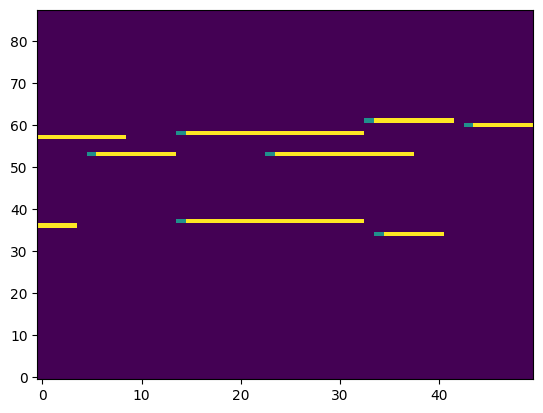

In [233]:
plt.imshow(create_encodec_piano_roll(a30_60)[...,50:100], aspect='auto', origin='lower', interpolation='none')

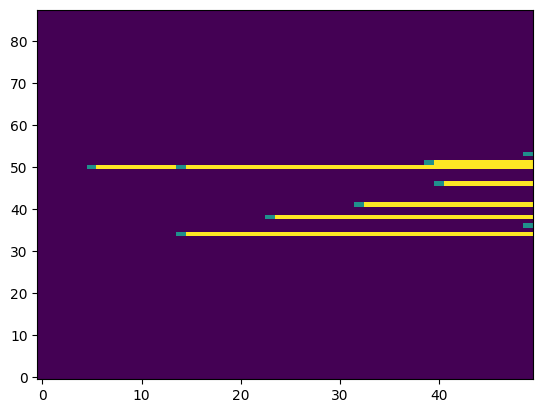

In [129]:
plt.imshow(create_encodec_piano_roll(a0_30)[...,50:100], aspect='auto', origin='lower', interpolation='none')

0.04728125
0.02
0.037281249999999995


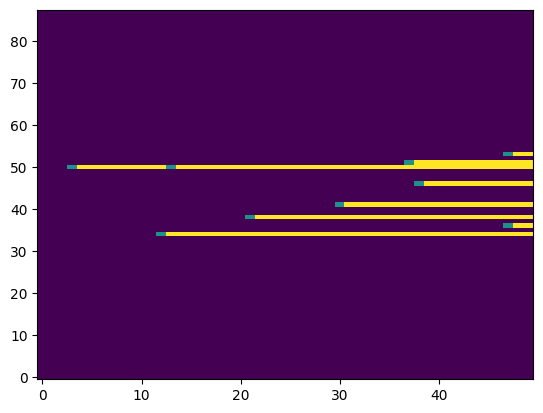

In [213]:
plt.imshow(create_encodec_piano_roll(a0_30)[...,50:100], aspect='auto', origin='lower', interpolation='none')

0.04728125
0.02
0.037281249999999995


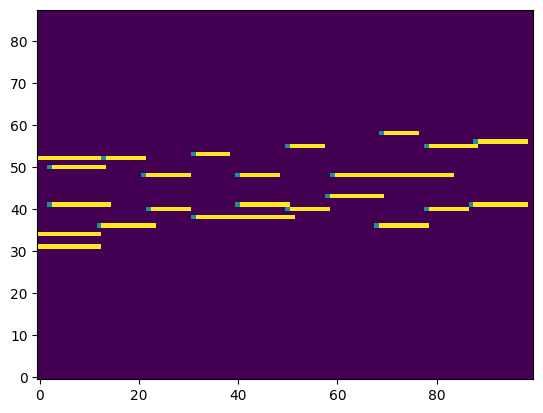

In [212]:
plt.imshow(create_encodec_piano_roll(a0_30)[...,-100:], aspect='auto', origin='lower', interpolation='none')

In [82]:
import matplotlib.pyplot as plt
import torch

In [174]:
a[-1][1]

968.6135416666841

In [180]:
a[-1][1]//30, a[-1][1]%30

(32.0, 8.613541666684114)

In [176]:
a_piano_roll = create_piano_roll(a)

In [178]:
a_piano_roll.shape

(88, 48431)

In [190]:
def slice_piano_roll(piano_roll):
    piano_roll_segments = []
    for i in range(int(piano_roll.shape[1]//1500)):
        piano_roll_segments.append(piano_roll[...,i*1500:(i+1)*1500])
    piano_roll_segments.append(piano_roll[...,-1500:])
    return piano_roll_segments

In [211]:
def slice_piano_roll_dict(piano_roll):
    piano_roll_segments = {}
    piano_roll_segments['len']=int(piano_roll.shape[1]//1500)+1
    for i in range(piano_roll_segments['len']-1):
        piano_roll_segments[i*30]=(piano_roll[...,i*1500:(i+1)*1500])
    piano_roll_segments[-1]=(piano_roll[...,-1500:])
    return piano_roll_segments

In [212]:
a_sliced_dict = slice_piano_roll_dict(a_piano_roll)

In [213]:
a_sliced_dict

{'len': 33,
 0: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 30: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 60: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 90: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0

In [208]:
len(piano_roll_segments)

33

In [182]:
48431//1500

32

In [181]:
48431%1500

431

In [184]:
431/50

8.62

In [210]:
torch.load("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.pt")

{'len': 33,
 0: tensor([[[ 166,  166,   83,  ...,  942, 1968, 1828],
          [1931, 2044, 1926,  ..., 1115, 1115, 1150],
          [2019, 2019, 2009,  ..., 2015, 2004, 1645],
          [1951, 1951, 1854,  ...,  553, 1387,  412]]]),
 30: tensor([[[  66, 1634, 1146,  ..., 1721, 1204, 1204],
          [1955, 1115, 1460,  ..., 1201,  943, 1473],
          [1784, 1945, 1798,  ...,  582,  657, 1102],
          [ 715,  269, 1945,  ..., 1036,  323,  566]]]),
 60: tensor([[[ 580,  654,  391,  ...,  986,   42,  944],
          [ 945, 1116, 1646,  ...,  704, 1987, 1489],
          [1296, 1586,  861,  ..., 1240,  630, 1637],
          [ 615,  728, 1920,  ...,  253,  677, 1141]]]),
 90: tensor([[[1658,  443, 1095,  ..., 1419,  564,  944],
          [ 867, 1865,  661,  ...,  326, 1583, 1596],
          [1249, 2021,  933,  ..., 1276,  102, 1329],
          [ 553, 1661,  475,  ..., 1380,  339, 1848]]]),
 120: tensor([[[  66, 1460,  289,  ...,   42,  654, 1978],
          [1217, 1803, 1425,  ..., 132

In [17]:
import torch

In [6]:
b = torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2018/MIDI-Unprocessed_Recital13-15_MID--AUDIO_13_R1_2018_wav--2_pianoroll.pkl')

In [14]:
from audiocraft.data.midi_dataset import EnCodecTokenMIDIDataset

In [15]:
path = '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0'

In [17]:
paths_loaded = torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/maestro-v3.0.0_split.pt')

In [23]:
dataset = EnCodecTokenMIDIDataset(paths_loaded['validation'])

  1%|          | 1/137 [00:00<00:51,  2.62it/s]

100%|██████████| 137/137 [00:26<00:00,  5.15it/s]


In [24]:
dataset[0][0].shape, dataset[0][1].shape

(torch.Size([4, 1500]), torch.Size([2, 88, 1500]))

In [25]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [26]:
train_features, train_labels = next(iter(train_dataloader))

In [27]:
train_features.shape, train_labels.shape

(torch.Size([8, 4, 1500]), torch.Size([8, 2, 88, 1500]))

In [12]:
from audiocraft.modules.semcodec import SemCodecMidiDecoder

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.8.18 (you have 3.8.10)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
/home/jongmin/.local/share/virtualenvs/audiocraft-ssbSDm-j/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
model = SemCodecMidiDecoder()

In [28]:
model.emb(train_features.permute(0,2,1)).shape

torch.Size([8, 1500, 256])

In [29]:
out = model(train_features)

In [62]:
cri = torch.nn.BCELoss()

In [66]:
train_labels

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

In [64]:
loss = cri(out, train_labels)

RuntimeError: all elements of target should be between 0 and 1

In [49]:
import torch

In [51]:
len(dataset)

1276

In [53]:
int(1276*0.1)

127

In [54]:
a,b,c = torch.utils.data.random_split(dataset, [len(dataset)-2*int(len(dataset)*0.1),int(len(dataset)*0.1),int(len(dataset)*0.1)])

In [55]:
len(a), len(b), len(c)

(1022, 127, 127)

In [56]:
len(a)+ len(b)+ len(c)

1276

In [67]:
import json

In [ ]:
f = open('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/maestro-v3.0.0.json')
json_loaded = json.load(f)
json_loaded["split"]

In [ ]:
json_loaded["midi_filename"]

In [73]:
len(json_loaded["midi_filename"])

1276

In [76]:
train_list = []
valid_list = []
test_list = []
for i in range(1276):
    if json_loaded["split"][str(i)] == "train":
        train_list.append(json_loaded["midi_filename"][str(i)])
    elif json_loaded["split"][str(i)] == "validation":
        valid_list.append(json_loaded["midi_filename"][str(i)])
    elif json_loaded["split"][str(i)] == "test":
        test_list.append(json_loaded["midi_filename"][str(i)])

In [78]:
len(train_list), len(valid_list), len(test_list)

(962, 137, 177)

In [81]:
torch.save({"train":train_list, "validation":valid_list, "test":test_list}, '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/maestro-v3.0.0_split.pt')

In [ ]:
torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/maestro-v3.0.0_split.pt')

In [1]:
import numpy as np
import torch


def extract_notes(onsets, frames, velocity, onset_threshold=0.5, frame_threshold=0.5):
    """
    Finds the note timings based on the onsets and frames information

    Parameters
    ----------
    onsets: torch.FloatTensor, shape = [frames, bins]
    frames: torch.FloatTensor, shape = [frames, bins]
    velocity: torch.FloatTensor, shape = [frames, bins]
    onset_threshold: float
    frame_threshold: float

    Returns
    -------
    pitches: np.ndarray of bin_indices
    intervals: np.ndarray of rows containing (onset_index, offset_index)
    velocities: np.ndarray of velocity values
    """
    onsets = (onsets > onset_threshold).cpu().to(torch.uint8)
    frames = (frames > frame_threshold).cpu().to(torch.uint8)
    onset_diff = torch.cat([onsets[:1, :], onsets[1:, :] - onsets[:-1, :]], dim=0) == 1

    pitches = []
    intervals = []
    # velocities = []

    for nonzero in onset_diff.nonzero():
        frame = nonzero[0].item()
        pitch = nonzero[1].item()

        onset = frame
        offset = frame
        # velocity_samples = []

        while onsets[offset, pitch].item() or frames[offset, pitch].item():
            # if onsets[offset, pitch].item():
                # velocity_samples.append(velocity[offset, pitch].item())
            offset += 1
            if offset == onsets.shape[0]:
                break

        if offset > onset:
            pitches.append(pitch)
            intervals.append([onset, offset])
            # velocities.append(np.mean(velocity_samples) if len(velocity_samples) > 0 else 0)

    return np.array(pitches), np.array(intervals) #, np.array(velocities)


def notes_to_frames(pitches, intervals, shape):
    """
    Takes lists specifying notes sequences and return

    Parameters
    ----------
    pitches: list of pitch bin indices
    intervals: list of [onset, offset] ranges of bin indices
    shape: the shape of the original piano roll, [n_frames, n_bins]

    Returns
    -------
    time: np.ndarray containing the frame indices
    freqs: list of np.ndarray, each containing the frequency bin indices
    """
    roll = np.zeros(tuple(shape))
    for pitch, (onset, offset) in zip(pitches, intervals):
        roll[onset:offset, pitch] = 1

    time = np.arange(roll.shape[0])
    freqs = [roll[t, :].nonzero()[0] for t in time]
    return time, freqs

In [8]:
b[0]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int8)

In [9]:
c = extract_notes(b[0][0], b[0][1], None)

In [89]:
train_labels.shape

torch.Size([8, 2, 88, 1500])

In [95]:
p_ref, i_ref = extract_notes(train_labels[0,0].T, train_labels[0,1].T, None)
p_est, i_est = extract_notes(out[0,0].T, out[0,1].T, None)

In [ ]:
!pip install git+https://github.com/craffel/mir_eval.git

In [31]:
import argparse
import os
import sys
from collections import defaultdict

import numpy as np
from mir_eval.multipitch import evaluate as evaluate_frames
from mir_eval.transcription import precision_recall_f1_overlap as evaluate_notes
from mir_eval.transcription_velocity import precision_recall_f1_overlap as evaluate_notes_with_velocity
from mir_eval.util import midi_to_hz
from scipy.stats import hmean
from tqdm import tqdm

SAMPLE_RATE = 32000
HOP_LENGTH = 640
MIN_MIDI = 21
MAX_MIDI = 108

eps = sys.float_info.epsilon


def evaluate(pred, label, onset_threshold=0.5, frame_threshold=0.5):
    metrics = defaultdict(list)

    p_ref, i_ref = extract_notes(label[0], label[1], None)
    p_est, i_est = extract_notes(pred[0], pred[1], None, onset_threshold, frame_threshold)

    t_ref, f_ref = notes_to_frames(p_ref, i_ref, label[1].shape)
    t_est, f_est = notes_to_frames(p_est, i_est, pred[1].shape)

    scaling = HOP_LENGTH / SAMPLE_RATE

    i_ref = (i_ref * scaling).reshape(-1, 2)
    p_ref = np.array([midi_to_hz(MIN_MIDI + midi) for midi in p_ref])
    i_est = (i_est * scaling).reshape(-1, 2)
    p_est = np.array([midi_to_hz(MIN_MIDI + midi) for midi in p_est])

    t_ref = t_ref.astype(np.float64) * scaling
    f_ref = [np.array([midi_to_hz(MIN_MIDI + midi) for midi in freqs]) for freqs in f_ref]
    t_est = t_est.astype(np.float64) * scaling
    f_est = [np.array([midi_to_hz(MIN_MIDI + midi) for midi in freqs]) for freqs in f_est]

    p, r, f, o = evaluate_notes(i_ref, p_ref, i_est, p_est, offset_ratio=None)
    metrics['metric/note/precision'].append(p)
    metrics['metric/note/recall'].append(r)
    metrics['metric/note/f1'].append(f)
    metrics['metric/note/overlap'].append(o)

    p, r, f, o = evaluate_notes(i_ref, p_ref, i_est, p_est)
    metrics['metric/note-with-offsets/precision'].append(p)
    metrics['metric/note-with-offsets/recall'].append(r)
    metrics['metric/note-with-offsets/f1'].append(f)
    metrics['metric/note-with-offsets/overlap'].append(o)

    # frame_metrics = evaluate_frames(t_ref, f_ref, t_est, f_est)
    # metrics['metric/frame/f1'].append(hmean([frame_metrics['Precision'] + eps, frame_metrics['Recall'] + eps]) - eps)

    # for key, loss in frame_metrics.items():
    #     metrics['metric/frame/' + key.lower().replace(' ', '_')].append(loss)

    return metrics

In [116]:
train_labels[0].shape

torch.Size([2, 88, 1500])

In [119]:
for i in zip(out, train_labels):
    print(i[0].shape, i[1].shape)

torch.Size([2, 88, 1500]) torch.Size([2, 88, 1500])
torch.Size([2, 88, 1500]) torch.Size([2, 88, 1500])
torch.Size([2, 88, 1500]) torch.Size([2, 88, 1500])
torch.Size([2, 88, 1500]) torch.Size([2, 88, 1500])
torch.Size([2, 88, 1500]) torch.Size([2, 88, 1500])
torch.Size([2, 88, 1500]) torch.Size([2, 88, 1500])
torch.Size([2, 88, 1500]) torch.Size([2, 88, 1500])
torch.Size([2, 88, 1500]) torch.Size([2, 88, 1500])


In [35]:
from matplotlib import pyplot as plt

In [36]:
train_labels.shape

torch.Size([8, 2, 88, 1500])

In [49]:
a.shape

torch.Size([1, 1, 960000])

In [50]:

import IPython.display as ipd

In [52]:
ipd.Audio(a[0].detach().numpy(), rate=32000)

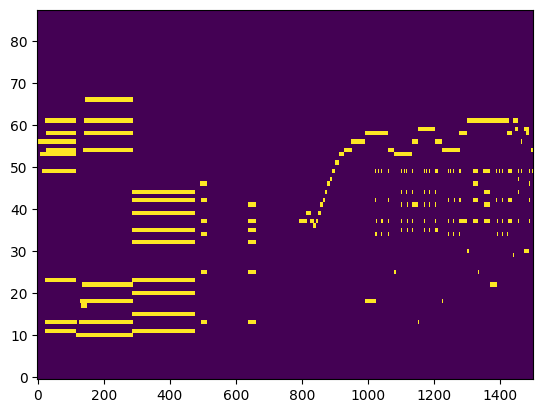

In [53]:
plt.imshow(train_labels[0][1], aspect='auto', origin='lower', interpolation='none')

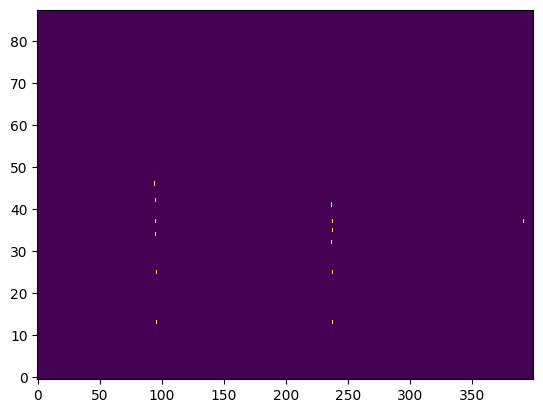

In [40]:
plt.imshow(train_labels[0][0][...,400:800], aspect='auto', origin='lower', interpolation='none')

In [34]:
a = evaluate(out[0], train_labels[0])

In [123]:
a

defaultdict(list,
            {'metric/note/precision': [0.0012676566461427019],
             'metric/note/recall': [0.875],
             'metric/note/f1': [0.0025316455696202528],
             'metric/note/overlap': [0.14883064336845844],
             'metric/note-with-offsets/precision': [0.0008149221296631656],
             'metric/note-with-offsets/recall': [0.5625],
             'metric/note-with-offsets/f1': [0.00162748643761302],
             'metric/note-with-offsets/overlap': [0.2006172839506173],
             0: [],
             1: []})

In [124]:
a['metric/note/precision']

[0.0012676566461427019]

In [100]:
scaling = HOP_LENGTH / SAMPLE_RATE

i_ref = (i_ref * scaling).reshape(-1, 2)
p_ref = np.array([midi_to_hz(MIN_MIDI + midi) for midi in p_ref])
i_est = (i_est * scaling).reshape(-1, 2)
p_est = np.array([midi_to_hz(MIN_MIDI + midi) for midi in p_est])

In [103]:
p, r, f, o = evaluate_notes(i_ref, p_ref, i_est, p_est)
p, r, f, o

(0.0, 0.0, 0.0, 0)

In [104]:
p, r, f, o = evaluate_notes(i_ref, p_ref, i_est, p_est, offset_ratio=None)
p, r, f, o

(0.0010623111907844503,
 0.6666666666666666,
 0.0021212422524941165,
 0.02512994334530531)

In [105]:
frame_metrics = evaluate_frames(t_ref, f_ref, t_est, f_est)
frame_metrics

NameError: name 't_ref' is not defined

In [129]:
loaded = torch.load('/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/maestro-v3.0.0_split.pt')
train_list = loaded["train"]
validation_list = loaded["validation"]
test_list = loaded["test"]

In [130]:
trainset = EnCodecTokenMIDIDataset(train_list)

  0%|          | 0/962 [00:00<?, ?it/s]


UnpicklingError: could not find MARK

In [4]:
from pathlib import Path

In [5]:
maestro_path = Path("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0")

In [20]:
prpt_paths = list(maestro_path.rglob("*_pianoroll.pt"))

In [21]:
len(prpt_paths)

1276

In [28]:
str(prpt_paths[0])

'/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2018/MIDI-Unprocessed_Recital1-3_MID--AUDIO_01_R1_2018_wav--3_pianoroll.pt'

In [29]:
from tqdm import tqdm

In [30]:
for prpt_path in tqdm(prpt_paths):
    os.remove(str(prpt_path))